In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import mixture
from math import e, pi, log
import scipy.io
import os

### Base Function 

In [3]:
def max_likelihood(X, means, cov, w):
    N, f = X.shape
    P = []
    for vector_index in range(N):
        weighted_prob = []
        for i in range(0,10):
            gaussian = (w[i])*np.exp(-0.5*np.dot(np.dot((X[vector_index]-means[i]), (np.linalg.inv(cov[i]))), 
                (np.transpose(X[vector_index]-means[i]))))/(((2*pi)**(f/2))*((np.linalg.det(cov[i]))**0.5))
            weighted_prob.append(gaussian)
        P.append(sum(weighted_prob))
    S = (1/N)*sum(log(j) for j in filter(lambda a: a!=0, P))
    return S

### Score  

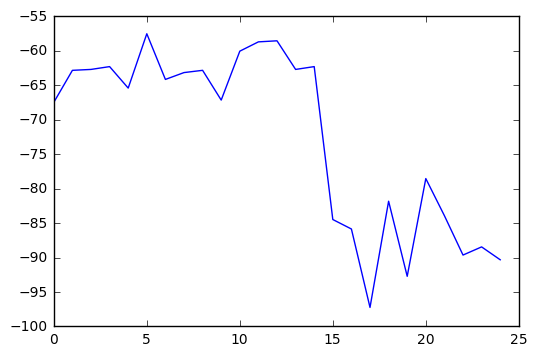

In [4]:
speaker_train = np.load('D:/share_folder/Models/VERIFICATION/3022313526/mfcc_train.npy')[0]
speaker_test = np.load('D:/share_folder/Models/VERIFICATION/3022313526/mfcc_test.npy')
imposter = np.load('D:/share_folder/Models/VERIFICATION/IMPOSTER/mfcc_test.npy')
GMM = mixture.GaussianMixture(n_components = 10, max_iter=150).fit(speaker_train)

score_speaker = [max_likelihood(speaker_test[i], GMM.means_, GMM.covariances_, GMM.weights_) for i in range(0, len(speaker_test))]
score_imposter = [max_likelihood(imposter[i], GMM.means_, GMM.covariances_, GMM.weights_) for i in range(0, len(imposter))]
all_score = score_speaker + score_imposter

plt.plot(all_score)

C:\Users\1\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


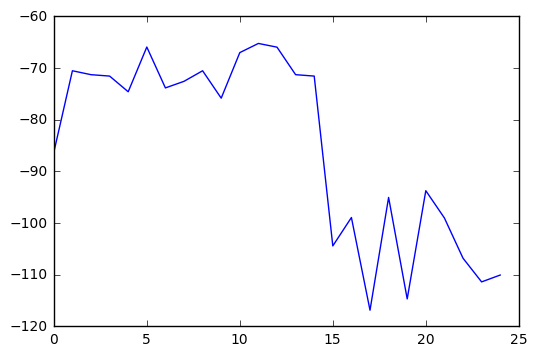

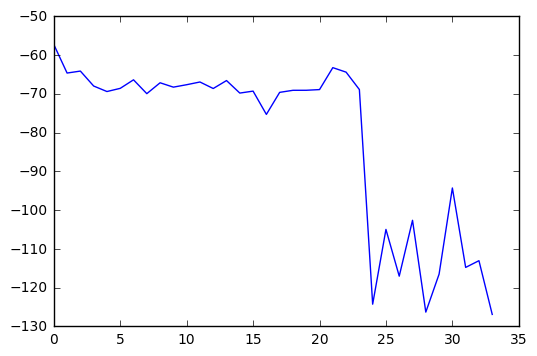

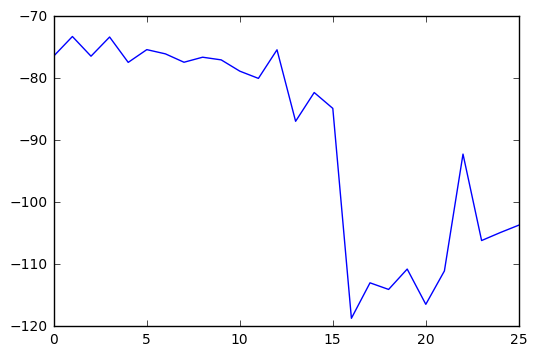

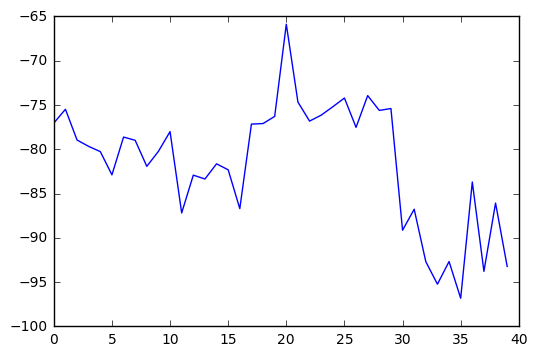

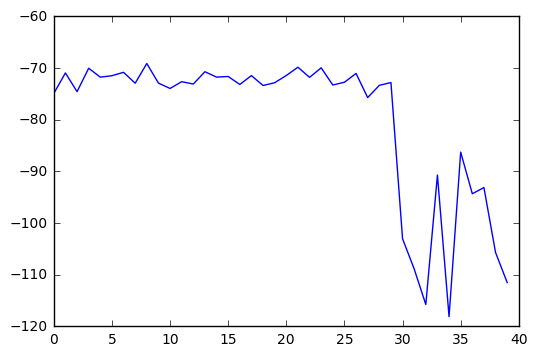

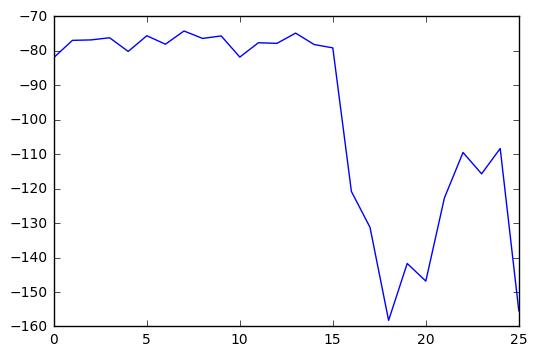

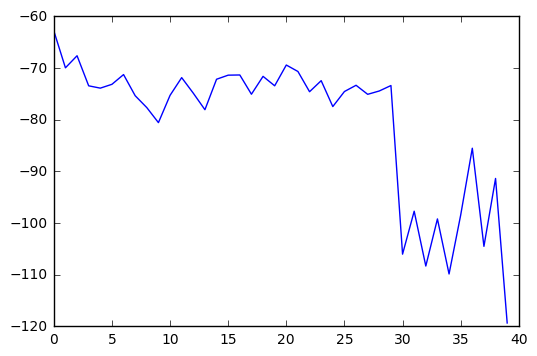

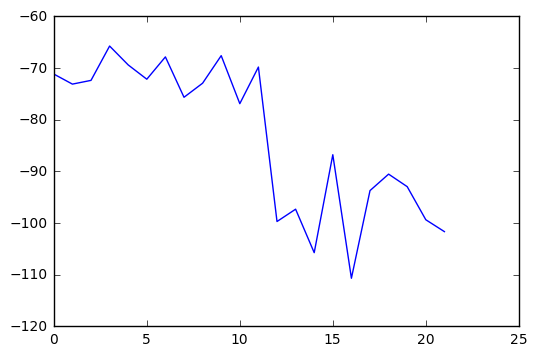

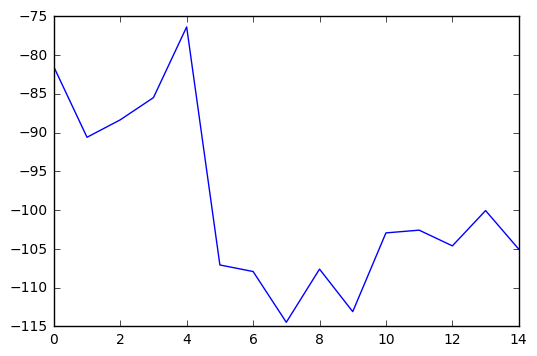

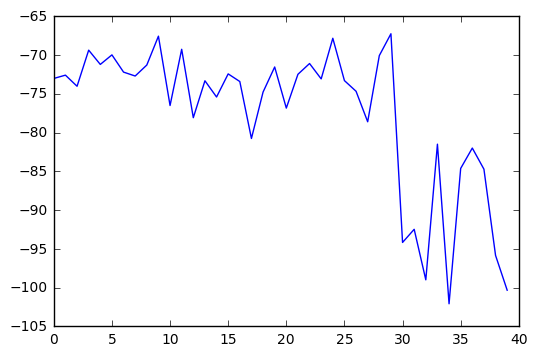

In [31]:
datafolder = '/Users/1/Desktop/share_vm/Models/VERIFICATION/'
folders = os.listdir(datafolder)
folders = folders[:10]
scores = []
d = {}

for i, folder in enumerate(folders):
    
    speaker_train = np.load(datafolder + folder + '/mfcc_train.npy')
    speaker_test = np.load(datafolder + folder + '/mfcc_test.npy')
    imposter = np.load(datafolder + 'IMPOSTER/mfcc_test.npy')
    
    #append mfcc_test из каждой папки для imposter model
    #imposter = []
    #for name in folders:
        #if name!=folder:
            #imposter.append(np.load('/Users/1/Desktop/VERIFICATION/' + name + '/mfcc_test.npy'))
            
    GMM = mixture.GaussianMixture(n_components = 20, max_iter=150).fit(speaker_train[0])
    
    score_speaker = [max_likelihood(speaker_test[i], GMM.means_, GMM.covariances_, GMM.weights_) for i in range(0, len(speaker_test))]
    #score_imposter = [max_likelihood(imposter[0][i], GMM.means_, GMM.covariances_, GMM.weights_) for i in range(0, len(imposter))]
    score_imposter = [max_likelihood(imposter[i], GMM.means_, GMM.covariances_, GMM.weights_) for i in range(0, len(imposter))]
    
    all_score = score_speaker + score_imposter
    scores.append(all_score)
    d[folder] = all_score
    
    f = plt.figure(i)
    plt.plot(all_score)
    f.show()

In [20]:
for i, score in enumerate(scores):
    print(folders[i])
    print(score)
    print('\n')
    for j,num in enumerate(score[:-10]):
        if num <= -71.5:
            print('Speaker: ', j+1, num)
    print('\n')
    for k,num in enumerate(score[-10:]):
        if num >= -71.5:
            print('Imposter: ', k+1, num)
    print('\n')
    print('\n')

3022313526
[-78.91155902018939, -71.10136167317604, -70.84399670355386, -70.95784300238846, -74.04751563194071, -64.49352998331561, -73.18520338968007, -70.05622263982971, -71.10136167317604, -74.56894327965263, -66.28662594223263, -64.95582116078371, -65.32959479634447, -70.84399670355386, -70.95784300238846, -97.15375272750309, -100.79140125003683, -113.50765374728459, -94.032994812044, -110.88797251459648, -89.54538598444712, -94.27170865563346, -97.38754451399676, -101.4763270963411, -102.41275712352204]


Speaker:  1 -78.91155902018939
Speaker:  5 -74.04751563194071
Speaker:  7 -73.18520338968007
Speaker:  10 -74.56894327965263






3024323104
[-57.96945698892554, -71.57950815856104, -73.0556588225841, -76.15864886618151, -79.42698030335303, -77.56597136685645, -74.47333531275669, -77.89896106420383, -75.97553114220788, -78.16522761278031, -76.81117620257943, -74.22995566007576, -72.56226537321105, -80.15624687609302, -78.28693055668197, -76.01407388910394, -84.17645093599391, -7

In [157]:
size = []
for key in d:
    size.append(len(d[key])-10)
print(sum(size))

err = 0
for i, score in enumerate(scores):
    for num in score[:-10]:
        if num <= -60:
            err = err+1            
print(err)
print(err/sum(size))

2183
295
0.13513513513513514
